In [34]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

In [35]:
#generate our dataset
#dataset=make_blobs(n_samples=200,centers=4,n_features=2,cluster_std=1.6,random_state=50)

In [36]:
df = pd.read_csv("DATASET.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,NaN,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [37]:
df['PhoneService'] = df['PhoneService'].fillna(0)

In [38]:
df['gender'].replace(['Male','Female'],[0,1],inplace=True)
df['Partner'].replace(['Yes','No'],[1,0],inplace=True)
df['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
df['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
df['MultipleLines'].replace(['No phone service','No','Yes'],[0,0,1],inplace=True)
df['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
df['InternetService'].replace(['DSL','Fiber optic','No'],[1,2,0],inplace=True)
df['Contract'].replace(['Month-to-month','One year','Two year'],[0,1,2],inplace=True)
df['PaymentMethod'].replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
df['Churn'].replace(['Yes','No'],[1,0],inplace=True)



In [39]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
total= le.fit_transform(df['TotalCharges'])
monthly = le.fit_transform(df['MonthlyCharges'])
df['TotalCharges'] = total
df['MonthlyCharges'] = monthly
df
f=df.drop(columns =['customerID'])
f.dtypes
f

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,142,2505,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,498,1466,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,436,157,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,266,1400,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,1,991,1597,0
7039,1,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,3,1340,5698,0
7040,1,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,0,137,2994,0
7041,0,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,1,795,2660,1


In [41]:
X = f.drop('TotalCharges',axis = 1)
y = f['TotalCharges']

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [45]:
print('Coefficients: \n', lm.coef_)


Coefficients: 
 [ 2.81702196e+01 -2.93781263e+01  3.02371422e+01 -5.25231191e+01
  4.62837512e-01 -6.99632444e+02 -3.83466313e+02 -9.66620508e+02
 -1.01946649e+02 -1.64812092e+02 -2.35330451e+02 -1.22645257e+02
 -5.16535511e+02 -2.89716240e+02  2.80443315e+02  9.83233460e+01
 -2.14913575e+01  3.55096228e+00  6.17114732e+01]


Text(0, 0.5, 'Predicted Y')

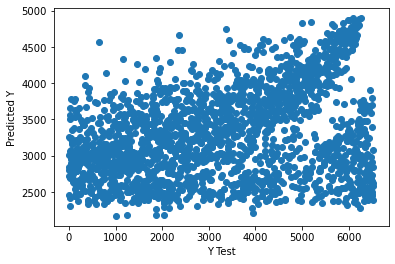

In [46]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [47]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1495.5152185158324
MSE: 3214006.7629591636
RMSE: 1792.7651165055515


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

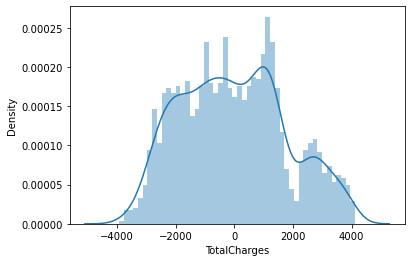

In [48]:
sns.distplot((y_test-predictions),bins=50)

In [49]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
gender,28.170220
SeniorCitizen,-29.378126
Partner,30.237142
Dependents,-52.523119
tenure,0.462838
PhoneService,-699.632444
MultipleLines,-383.466313
InternetService,-966.620508
OnlineSecurity,-101.946649
OnlineBackup,-164.812092


In [50]:
### DECISION TREE

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [52]:
DecisionTreeRegModel = DecisionTreeRegressor()
DecisionTreeRegModel.fit(X_train,y_train)

DecisionTreeRegressor()

In [53]:
y_pred = DecisionTreeRegModel.predict(X_test)
r2_score(y_test, y_pred)

0.7479609671251561

In [54]:
mse = mean_squared_error(y_test, y_pred)
mse

910688.9504259347

In [55]:
rmse = np.sqrt(mse)
rmse

954.3002412374916

In [56]:
###RANDOM FOREST

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=13)


In [59]:
clf = RandomForestRegressor(n_estimators = 3000, random_state = 10)
# Train the model on training data
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=3000, random_state=10)

In [60]:
prediction_s = clf.predict(X_test)
# Calculate the absolute errors
errors_s = abs(prediction_s - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_s), 2), 'degrees.')

Mean Absolute Error: 269.1 degrees.


In [61]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors_s - y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 297778.34 %.


In [62]:
accuracy = clf.score(X_test, y_test) #test Accuracy squared error for linreg
print(accuracy)

0.8513418040554923
